### Case Study – 1

#### Domain –Automotive
focus – Incentivize drivers

#### Business challenge/requirement
Lithionpower is the largest provider of electric vehicle(e-vehicle) batteries. It
provides battery on a rental model to e-vehicle drivers. Drivers rent battery typically
for a day and then replace it with a charged battery from the company.
Lithionpower has a variable pricing model based on the driver's driving history. As
the life of a battery depends on factors such as overspeeding, distance driving per
day, etc.
You as an ML expert have to create a cluster model where drivers can be grouped
based on the driving data.

#### Key issues
Drivers will be incentivized based on the cluster, so grouping has to be accurate

#### Considerations
NONE

#### Data volume
- 4000 records – file driver-data.csv

#### Fields in Data
• id: Unique Id of the driver
• mean_dist_day: Mean distance driven by driver per day
• mean_over_speed_perc: Mean percentage of time a driver was > 5 mph over
the speed limit

#### Additional information
- NA

#### Business benefits
Increase in profits, up to 15-20% as drivers with poor history will be charged more

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("data/driver-data.csv")
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


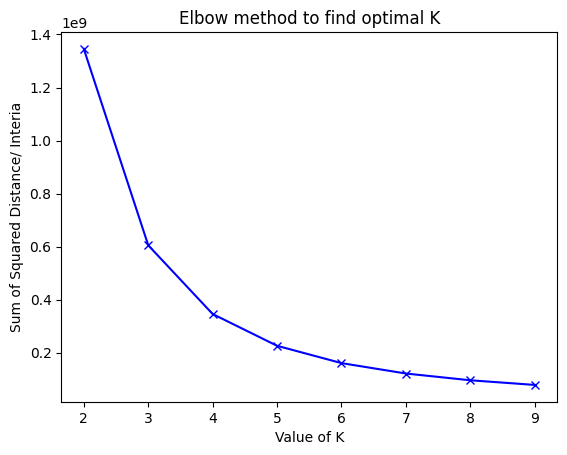

In [6]:
# identify no of clusters using elbow method
sum_of_squared_distances=[]
k_range=range(2,10)

for cluster_num in k_range:
    kmeans=KMeans(n_clusters=cluster_num)
    kmeans.fit(df)
    
    sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(k_range, sum_of_squared_distances,'bx-')
plt.xlabel("Value of K")
plt.ylabel("Sum of Squared Distance/ Interia")
plt.title("Elbow method to find optimal K")
plt.show()
    
    

In [8]:
# from elbow method, observed that no of clusters could be 4 where it is forming elbow

kmeans=KMeans(n_clusters=4)
kmeans.fit(df)

print(kmeans.cluster_centers_)

[[3.42331094e+09 7.74391176e+01 1.01480730e+01]
 [3.42331294e+09 7.41348317e+01 1.08118812e+01]
 [3.42331395e+09 7.48182968e+01 1.09073705e+01]
 [3.42331193e+09 7.78173700e+01 1.10070000e+01]]


In [10]:
df['cluster']=kmeans.labels_

Text(0, 0.5, 'Total count in cluster')

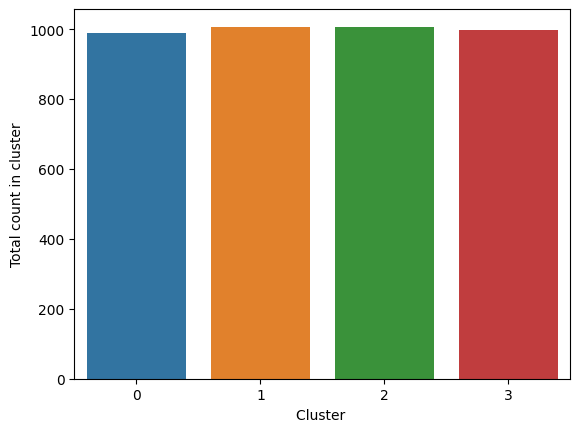

In [12]:
cluster_counts=df['cluster'].value_counts()

sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel("Cluster ")
plt.ylabel("Total count in cluster")

In [14]:
cluster_counts

1    1007
2    1005
3     999
0     989
Name: cluster, dtype: int64